In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('bus_data.csv')
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,speed,paxLoad,totalCap,outOfService,more,tripId,deviceId,outdated,routeBlockId,timestamp
0,4855,4131,Transit Bus,135.131827,A Route,04:32 PM,-74.450146,40.501523,NaN,0,67,0,102,NaN,402213,0,111533,2024-10-24 16:32:24
1,4856,4132,Transit Bus,332.053051,EE Route,04:32 PM,-74.445469,40.500126,NaN,3,67,0,102,NaN,402215,0,111579,2024-10-24 16:32:24
2,4859,4177,Transit Bus,112.470602,LX Route,04:32 PM,-74.448120,40.499571,NaN,7,67,0,101,NaN,402325,0,111425,2024-10-24 16:32:24
3,4873,4191,Transit Bus,194.693413,H Route,04:32 PM,-74.466362,40.514399,NaN,5,67,0,101,NaN,402329,0,111644,2024-10-24 16:32:24
4,4876,4194,Transit Bus,45.622735,F Route,04:32 PM,-74.437797,40.484496,NaN,5,67,0,102,NaN,402330,0,117895,2024-10-24 16:32:24


In [7]:
# convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.drop(['speed', 'outOfService', 'tripId', 'outdated'], axis=1, inplace=True)
data['load'] = data['paxLoad'] / data['totalCap']
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
0,4855,4131,Transit Bus,135.131827,A Route,04:32 PM,-74.450146,40.501523,0,67,102,402213,111533,2024-10-24 16:32:24,0.000000
1,4856,4132,Transit Bus,332.053051,EE Route,04:32 PM,-74.445469,40.500126,3,67,102,402215,111579,2024-10-24 16:32:24,0.044776
2,4859,4177,Transit Bus,112.470602,LX Route,04:32 PM,-74.448120,40.499571,7,67,101,402325,111425,2024-10-24 16:32:24,0.104478
3,4873,4191,Transit Bus,194.693413,H Route,04:32 PM,-74.466362,40.514399,5,67,101,402329,111644,2024-10-24 16:32:24,0.074627
4,4876,4194,Transit Bus,45.622735,F Route,04:32 PM,-74.437797,40.484496,5,67,102,402330,117895,2024-10-24 16:32:24,0.074627


C:\Users\akash\AppData\Local\Temp\ipykernel_4356\2979090570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['load'])


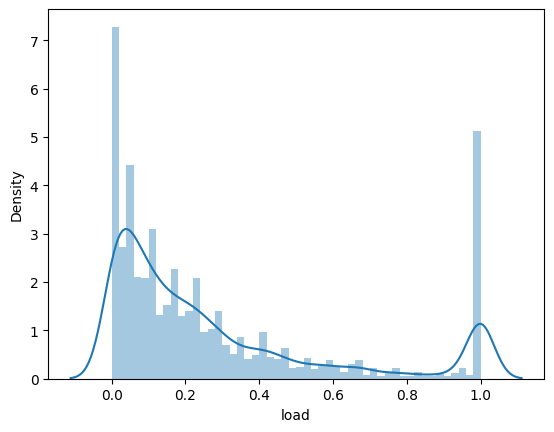

In [12]:
# plot the distribution of the load
sns.distplot(data['load'])
plt.show()

In [13]:
data.describe()

,id,name,calculatedCourse,longitude,latitude,speed,paxLoad,totalCap,outOfService,more,tripId,deviceId,outdated,routeBlockId,load
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,0.0,41744.000000,41744.000000,41744.0,41744.000000,0.0,41744.000000,41744.0,41744.000000,41744.000000
mean,9379.187452,3299.327975,178.313246,-74.448007,40.508234,NaN,18.428085,66.452903,0.0,101.383911,NaN,412654.403699,0.0,110002.671162,0.279996
std,4605.806984,1552.002524,97.635897,0.010096,0.015191,NaN,21.015514,7.903072,0.0,4.506037,NaN,9869.231577,0.0,15646.277709,0.310120
min,4840.000000,127.000000,0.018745,-74.466586,40.478880,NaN,0.000000,30.000000,0.0,11.000000,NaN,402213.000000,0.0,5451.000000,0.000000
25%,4877.000000,4002.000000,102.878495,-74.457361,40.499131,NaN,3.000000,67.000000,0.0,101.000000,NaN,402720.000000,0.0,111431.000000,0.056338
50%,7181.000000,4040.000000,160.499943,-74.448189,40.507992,NaN,11.000000,67.000000,0.0,102.000000,NaN,411187.000000,0.0,111641.000000,0.164179
75%,13214.000000,4190.000000,273.824676,-74.438514,40.523530,NaN,25.000000,67.000000,0.0,102.000000,NaN,422698.000000,0.0,112514.000000,0.386667
max,17626.000000,4910.000000,359.970812,-74.186618,40.739761,NaN,80.000000,80.000000,0.0,105.000000,NaN,429484.000000,0.0,117898.000000,1.000000


In [14]:
# print the unique values of deviceId
print(data['deviceId'].unique())

[402213 402215 402325 402329 402330 402643 402645 402646 402647 402694
 402696 402698 402699 402707 402708 402720 402723 402727 402729 402741
 402867 405378 405380 405382 405404 406275 411187 411189 415102 415104
 415105 417553 417554 417555 417557 417559 422692 422694 422698 422700
 422708 422712 422714 428735 429476 429478 429482 429484 402733 405192]


In [15]:
# print the unique values of routeBlockId
print(data['routeBlockId'].unique())

[111533 111579 111425 111644 117895 112515 111422 111416 111683 111423
 111420 111418 111535 111679 111643 111676 111534 113248 113251 113278
 112513 117897 117896 111602 111603 111531 111413 111421 111641 111680
 111582 111682 111424 112516 112747 111532 111426 111580 111642 112514
 111340 113246 113250 113249   5451 117898 111601 111581 111419 111604
 111646 111427 111645 113252 111605 111681 111606 111341 111607 111428
 111647 111648 111429 111538 112517 113253 111684 111685 111539 111430
 112518 111609 111608 117891 117892 117893 111610 111649 113255 113254
 111431 111540 111686 112519   5452 117894 111432 111433 111650 113256
 111687]


In [16]:
# for each unique routeBlockId, print the average value of latitude and longitude as well as load
for routeBlockId in data['routeBlockId'].unique():
    print(routeBlockId)
    print(data[data['routeBlockId'] == routeBlockId].mean())
    print()

111533
id                    5892.302483
name                  4118.957111
calculatedCourse       175.500550
longitude              -74.456567
latitude                40.512916
speed                         NaN
paxLoad                  6.857788
totalCap                67.000000
outOfService             0.000000
more                   101.591422
tripId                        NaN
deviceId            404755.787810
outdated                 0.000000
routeBlockId        111533.000000
load                     0.102355
dtype: float64

111579
id                    4856.000000
name                  4132.000000
calculatedCourse       188.695475
longitude              -74.442291
latitude                40.493063
speed                         NaN
paxLoad                 17.041975
totalCap                67.000000
outOfService             0.000000
more                   101.516049
tripId                        NaN
deviceId            402215.000000
outdated                 0.000000
routeBlockId      

C:\Users\akash\AppData\Local\Temp\ipykernel_4356\1007212681.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data[data['routeBlockId'] == routeBlockId].mean())
C:\Users\akash\AppData\Local\Temp\ipykernel_4356\1007212681.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data[data['routeBlockId'] == routeBlockId].mean())


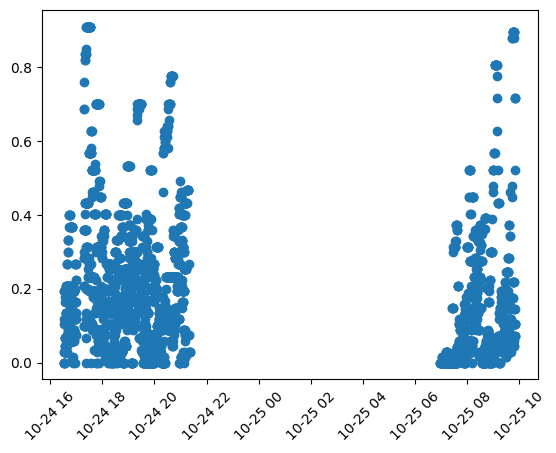

In [20]:
# get a specific route and plot the scatter plot of load over time
route = 'A Route'
data_route = data[data['routeName'] == route]
plt.scatter(data_route['timestamp'], data_route['load'])
# make the x axis more readable
plt.xticks(rotation=45)
plt.show()

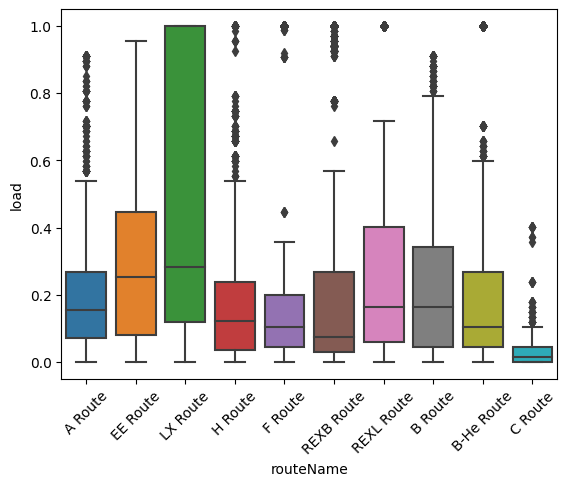

In [21]:
# plot the distribution of load for each route
sns.boxplot(x='routeName', y='load', data=data)
plt.xticks(rotation=45)
plt.show()

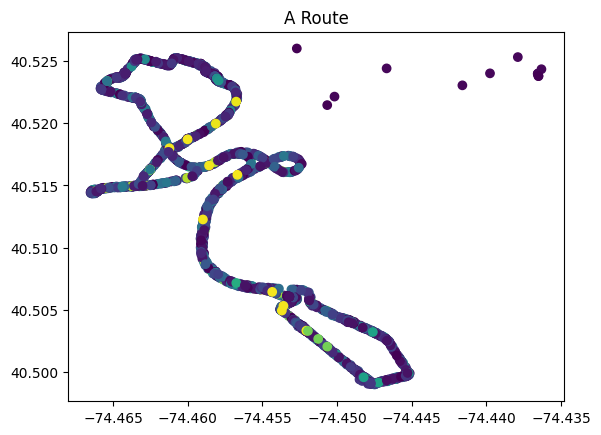

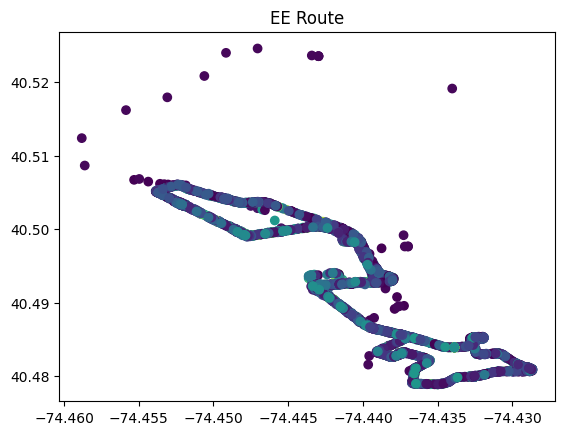

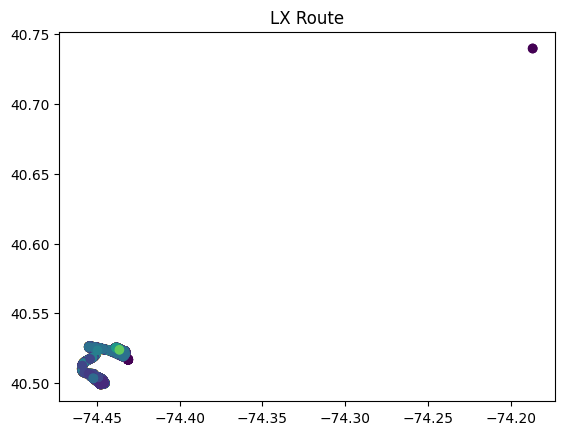

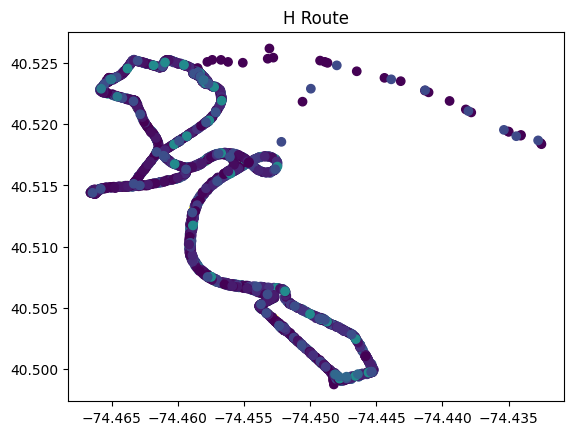

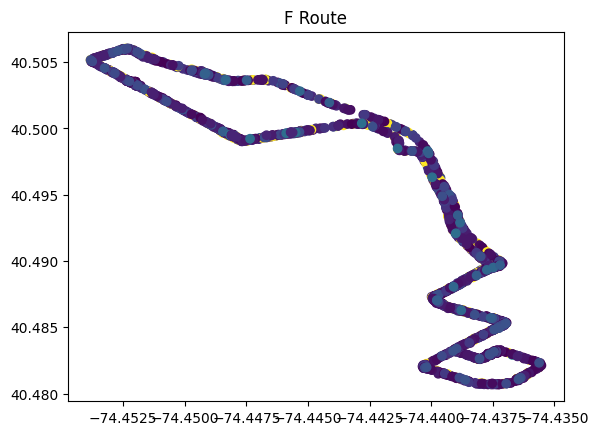

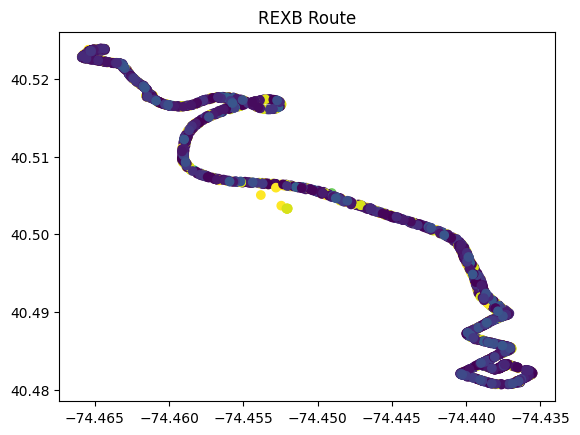

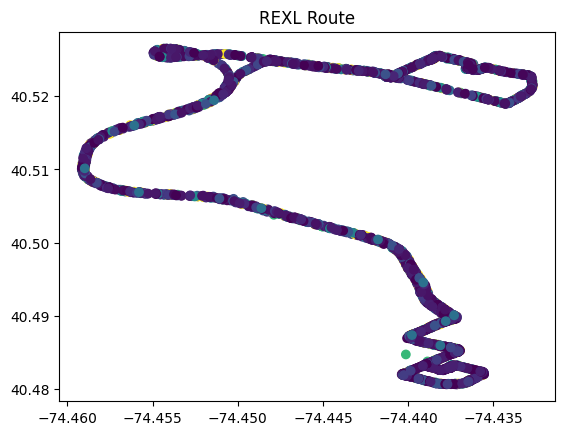

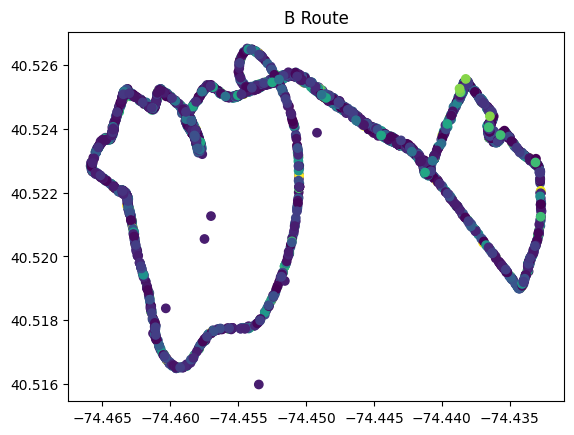

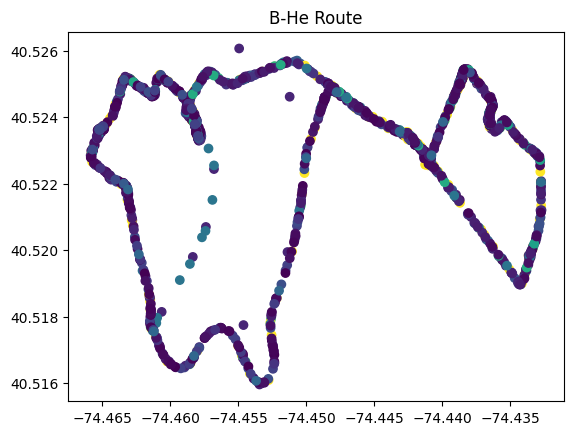

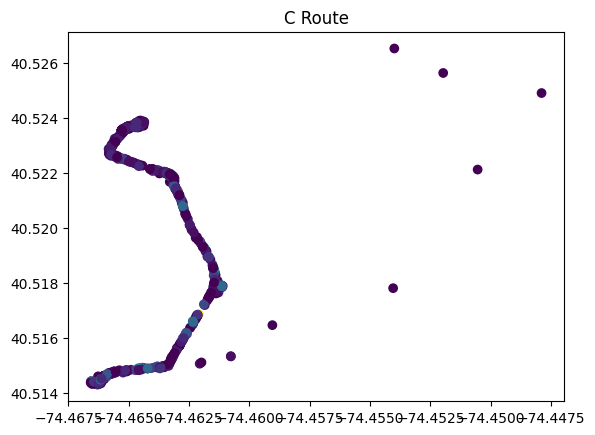

In [22]:
# make a heat map with the longitude and latitude data for each route
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]
    plt.scatter(data_route['longitude'], data_route['latitude'], c=data_route['load'])
    plt.title(route)
    plt.show()

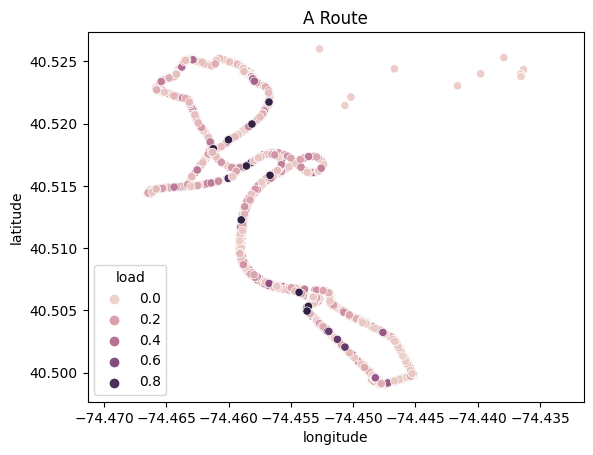

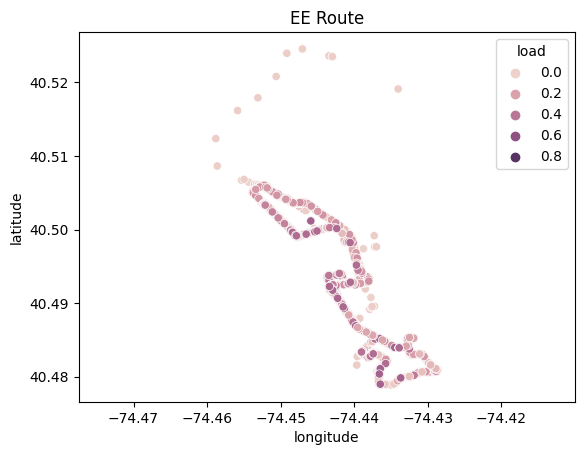

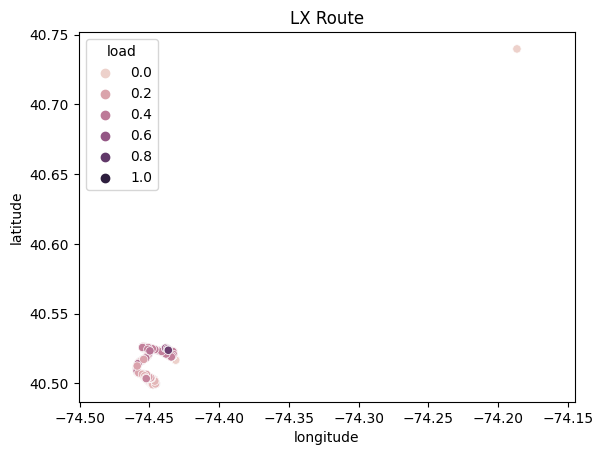

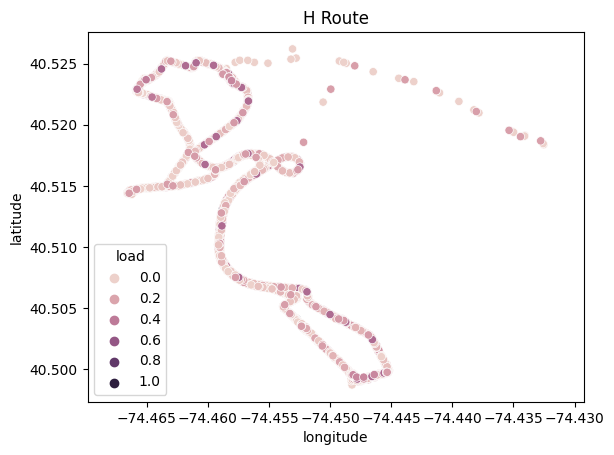

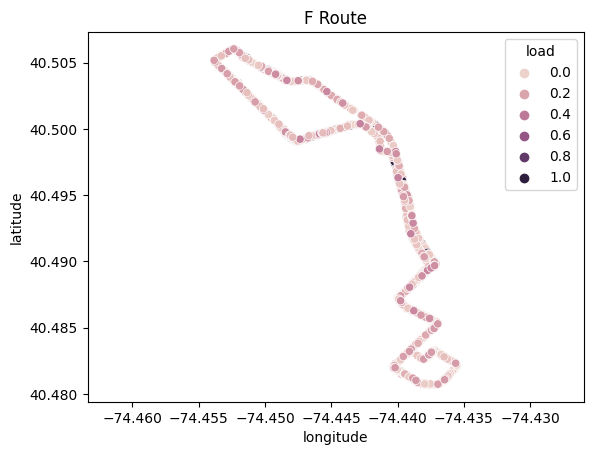

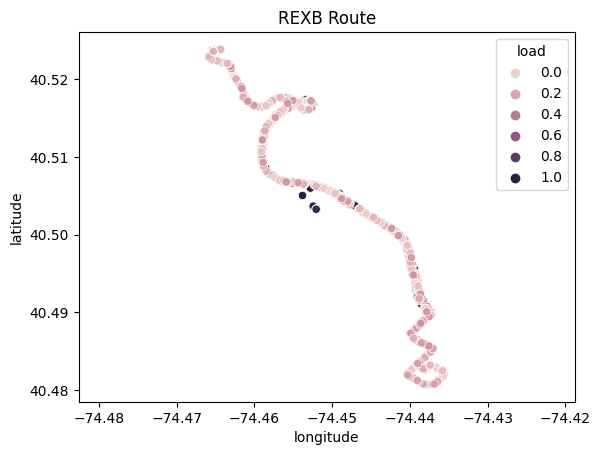

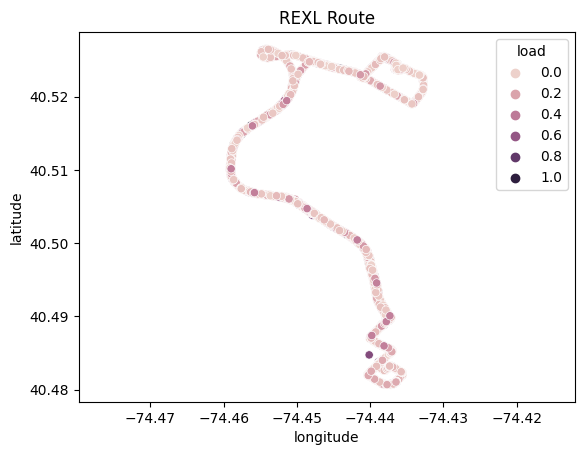

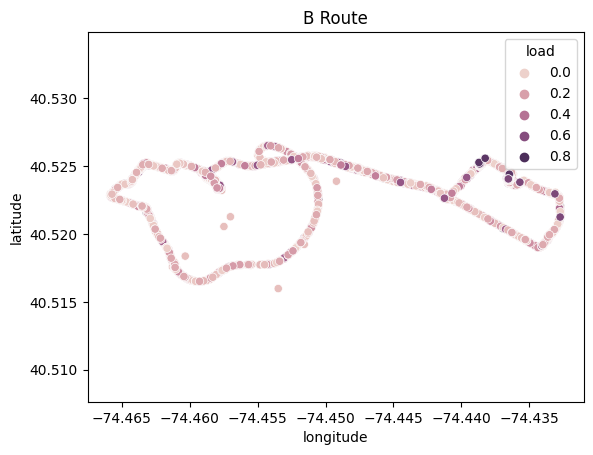

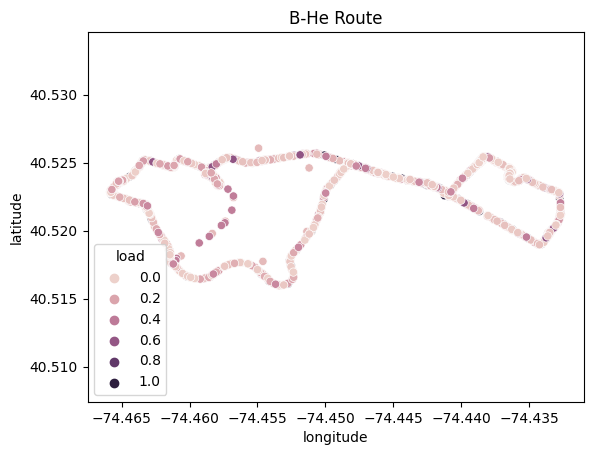

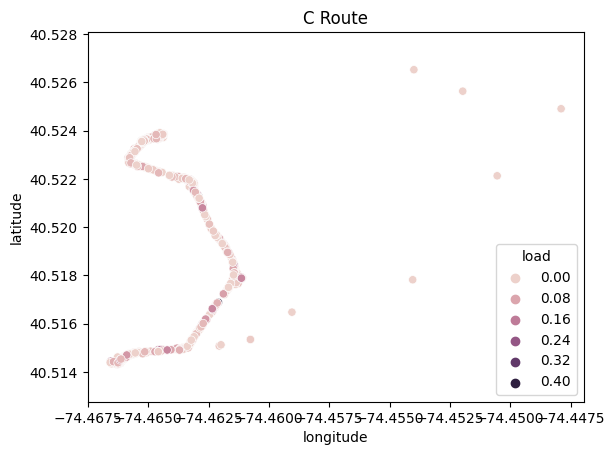

In [31]:
# plot the scatter plot of longitude and latitude for each route as well as hue for the load
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]
    sns.scatterplot(x='longitude', y='latitude', hue='load', data=data_route)
    plt.title(route)

    # make it so that the x and y scale is the same
    plt.axis('equal')
    plt.show()

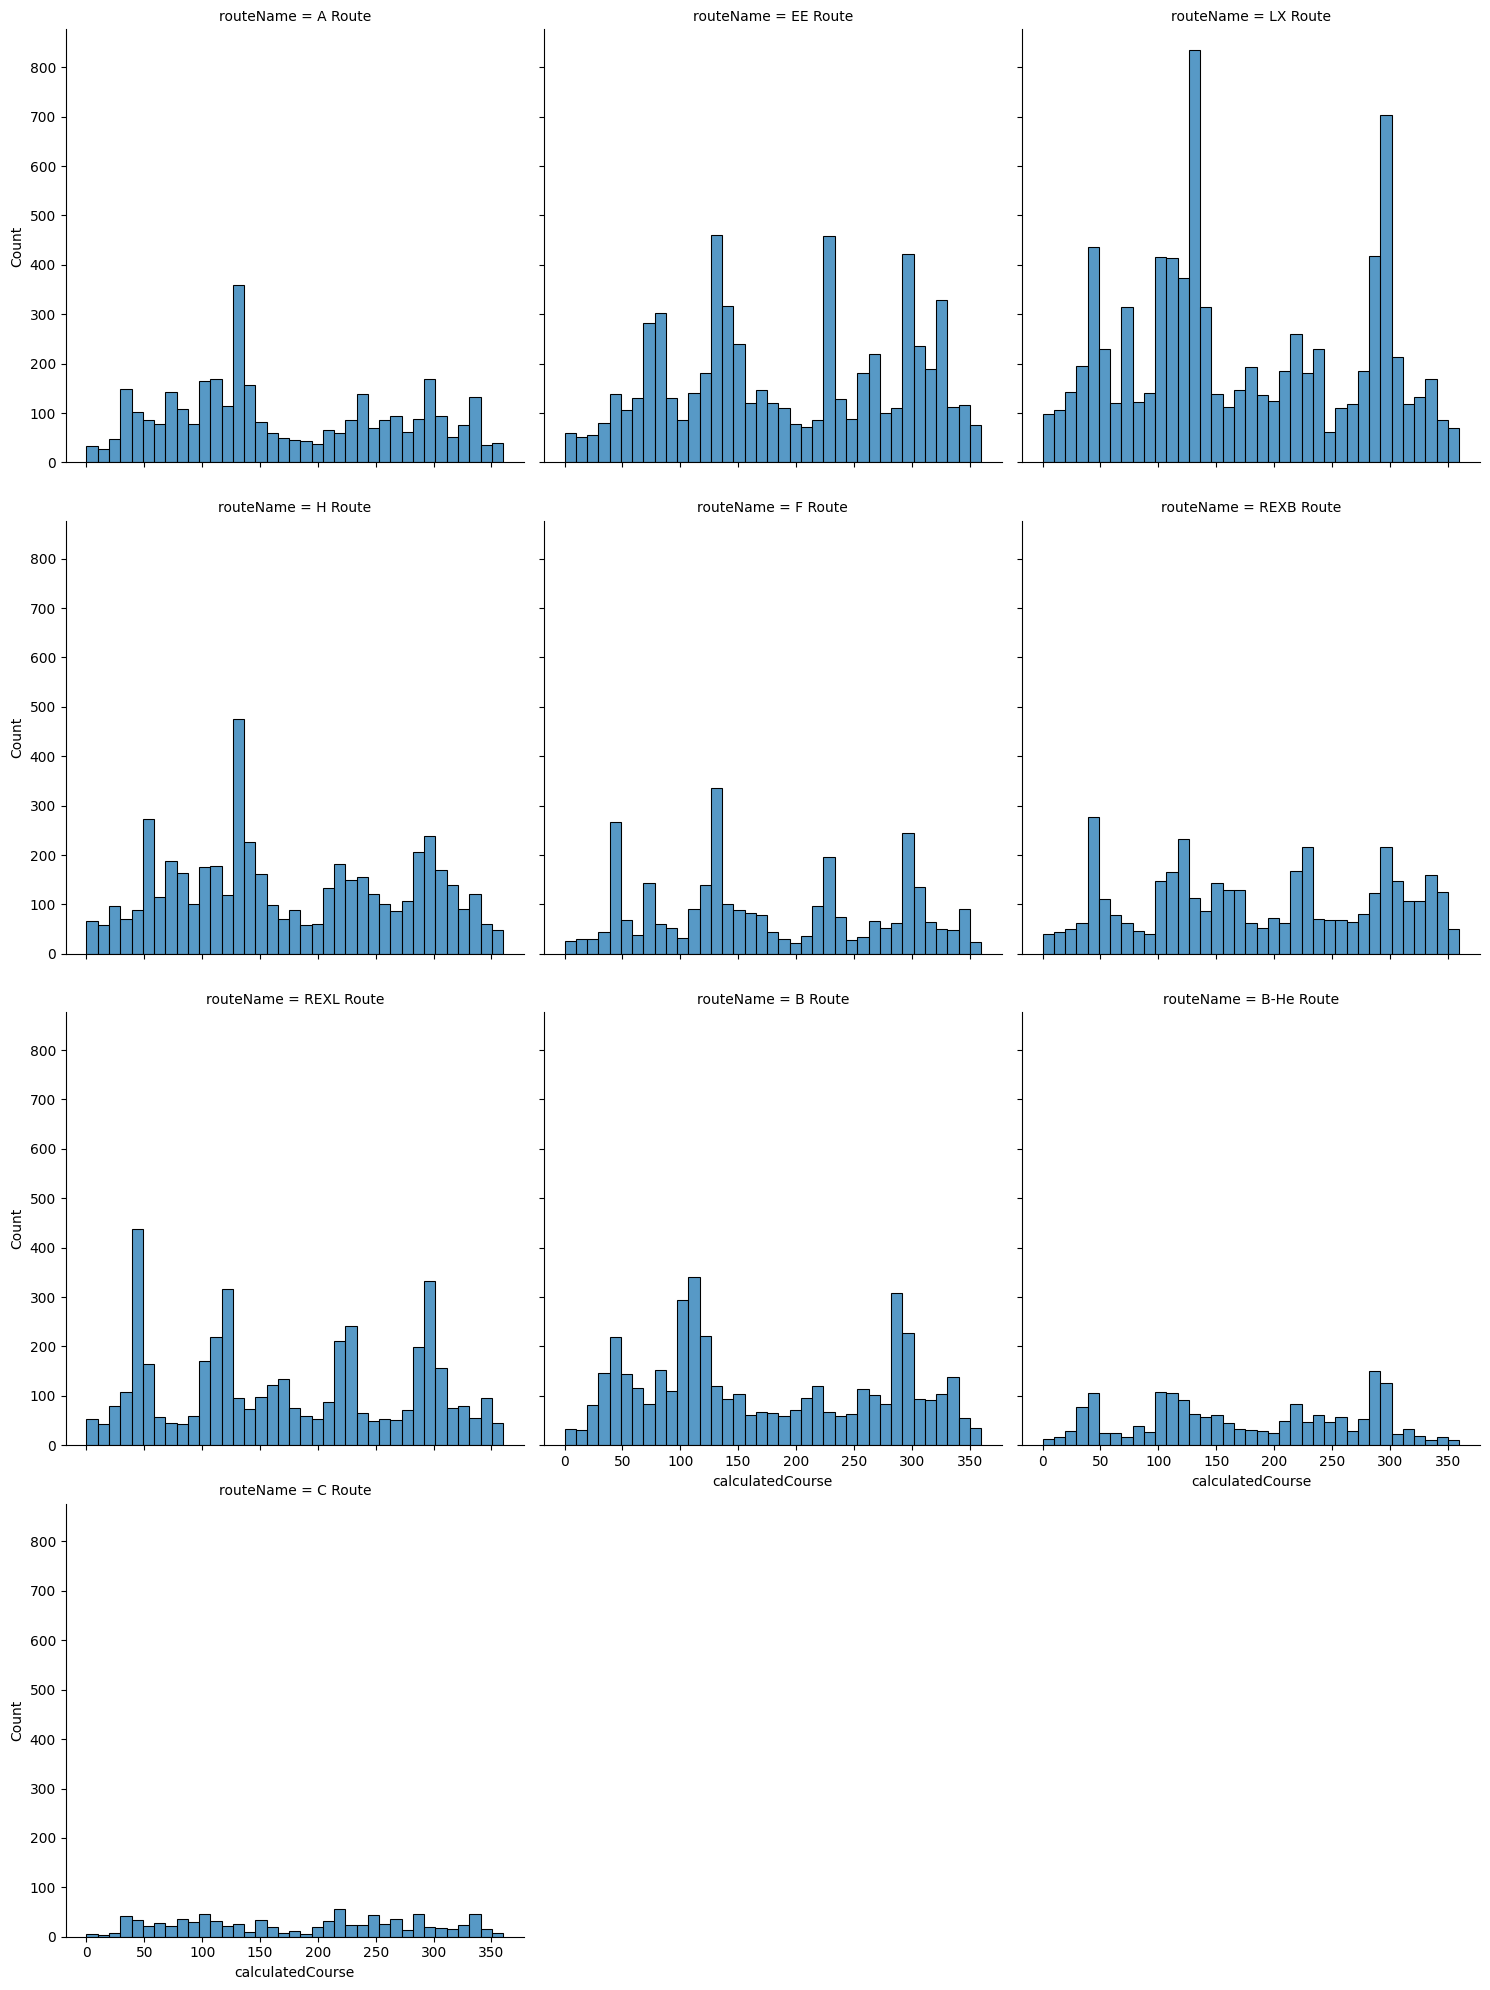

In [29]:
# graph the distribution of more
sns.displot(data, x='calculatedCourse', col='routeName', col_wrap=3)
plt.show()

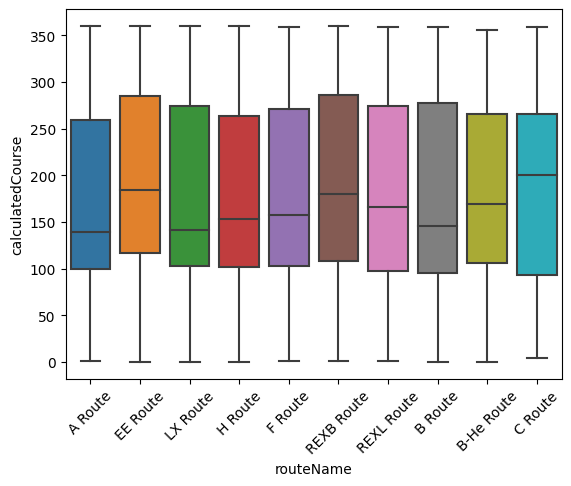

In [30]:
# plot the distribution of calc course for each route
sns.boxplot(x='routeName', y='calculatedCourse', data=data)
plt.xticks(rotation=45)
plt.show()

In [33]:
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]

    # Initialize map at an approximate central location of your data
    map_route = folium.Map(
        location=[data_route['latitude'].mean(), data_route['longitude'].mean()],
        zoom_start=12
    )

    # Add points with MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(map_route)
    for _, row in data_route.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color="blue" if row['load'] < 0.3 else "red",  # Adjust color based on load threshold
            fill=True,
            fill_opacity=0.7
        ).add_to(marker_cluster)

    # Show or save the map
    map_route.save(f"maps/{route}_map.html")  # Save as HTML file
    map_route


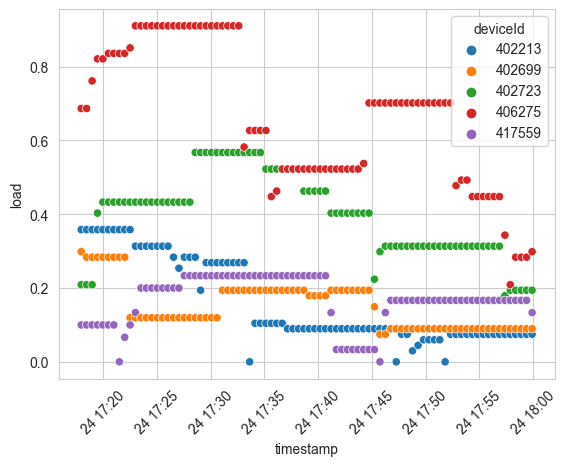

In [31]:
# get a specific route and plot the scatter plot of load over time
route = 'A Route'
data_route = data[data['routeName'] == route]

# get the time values between two times
start_time = pd.Timestamp('2024-10-24 17:00:00')
end_time = pd.Timestamp('2024-10-24 18:00:00')

data_route = data_route[(data_route['timestamp'] > start_time) & (data_route['timestamp'] < end_time)]

# add a hue for each device id
sns.scatterplot(x='timestamp', y='load', hue='deviceId', data=data_route, palette='tab10')

plt.xticks(rotation=45)
plt.show()